In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(int('0xC0FFEE', 16))
np.random.seed(int('0xC0FFEE', 16))
PI = math.pi

## Numpy data load




In [3]:
### np.savez('./filename.npz', x=X, y=Y)

practice1_data = np.load('./practice1_data.npz')
print(f'Check key values: {practice1_data.files}')
X, Y = practice1_data['x'], practice1_data['y']
print(X.shape, Y.shape)
print(X[0:10], Y[0:10])

Check key values: ['x', 'y']
(1000,) (1000,)
[160.86429835 174.97366162 173.9137621  163.800405   190.03698413
 166.23929116 186.3450603  177.38916332 166.12647418 169.35983898] [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# Practice 1
평균, 시그마가 정해진 두 개의 클래스에서 1차원 데이터를 샘플링해서, 히스토그램과 확률분포 함수를 각각 그려보시오.

In [4]:
def show_histogram(A, B):
    plt.hist(A, label='a', alpha=0.5)
    plt.hist(B, label='b', alpha=0.5)
    plt.legend(loc='upper left')
    plt.show()

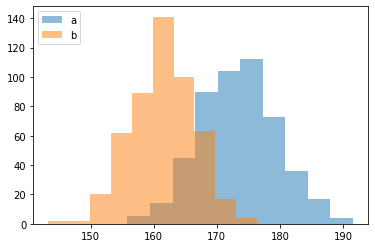

In [5]:
show_histogram(X[Y==0], X[Y==1])

In [6]:
def pdf(x, mean, std):
    return (1 / std * np.sqrt(PI * 2)) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))

In [7]:
def show_pdf(x, Y_A, Y_B):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

In [8]:
x = np.linspace(140, 200, 1000)
Y_A = pdf(x, np.mean(X[Y==0]), np.std(X[Y==0]))
Y_B = pdf(x, np.mean(X[Y==1]), np.std(X[Y==1]))

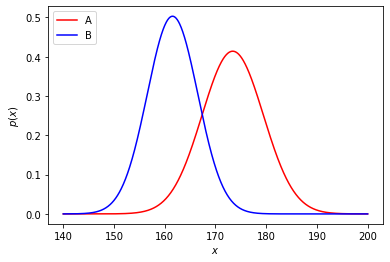

In [9]:
show_pdf(x, Y_A, Y_B)

# Practice 2

추가적으로 테스트 데이터를 샘플링해서, likelihood값만을 이용하는 경우, prior값과 결합하여 posterior로 볼 경우 각각에 대하여 분류 정확도를 보고하고 

(a) likelihood 함수를 그리고, 

(b) prior 적용 시, likelihood x prior 함수를 그리고,

(c) posterior =  likelihood x prior / p(x) 를 그리시오. 

prior의 변화에 따라 decision point를 그래프에서 대략적으로 읽고, prior에 따라서 분류 결과가 어떻게 변화하는지 설명하시오.

In [10]:
practice2_train = np.load('./practice2_train.npz')
print(f'Check key values: {practice2_train.files}')
X_train, Y_train = practice2_train['x'], practice2_train['y']
print(X_train.shape)

Check key values: ['x', 'y']
(1000,)


In [11]:
practice2_test = np.load('./practice2_test.npz')
print(f'Check key values: {practice2_test.files}')
X_test, Y_test = practice2_test['x'], practice2_test['y']
print(X_test.shape)

Check key values: ['x', 'y']
(100,)


In [12]:
def get_likelihood(x, A_mean, A_std, B_mean, B_std):
    return pdf(x, A_mean, A_std), pdf(x, B_mean, B_std)

In [13]:
def get_prior(A, B):
    prior_A = len(A)/ (len(A) + len(B))
    return (prior_A), (1 - prior_A)

In [14]:
def get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior):
    evidence = (A_likelihood * A_prior) + (B_likelihood * B_prior)
                 
    return A_likelihood * A_prior / evidence, B_likelihood * B_prior / evidence

In [15]:
def get_accuracy(Y_test, A_prob, B_prob):
    y_pred = np.where(A_prob > B_prob, 0, 1)

    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

Acc: 0.86


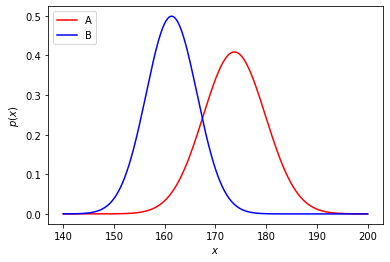

In [16]:
A_likelihood, B_likelihood = get_likelihood(X_test, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))

y_pred = np.where(A_likelihood > B_likelihood, 0, 1)

print(f'Acc: {get_accuracy(Y_test, A_likelihood, B_likelihood)}')

graph_x = np.linspace(140, 200, 1000)
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))
show_pdf(graph_x, A_graph_x, B_graph_x)

0.25 0.75
Acc: 0.83


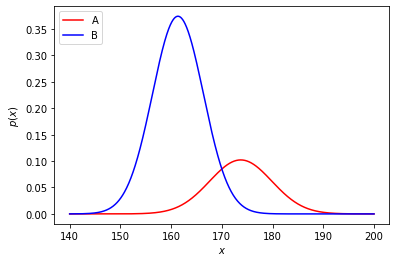

In [17]:
A_prior, B_prior = get_prior(X_train[Y_train==0], X_train[Y_train==1])

print(A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_likelihood * A_prior, B_likelihood * B_prior)}')

show_pdf(graph_x, A_graph_x * A_prior, B_graph_x * B_prior)

Acc: 0.83


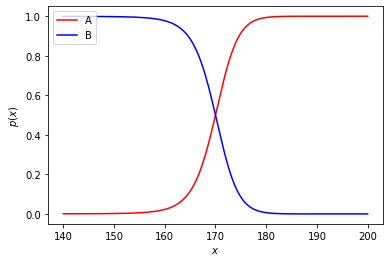

In [18]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, A_prior, B_prior)


show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.5
- prior_B: 0.5

In [19]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.5, 0.5)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.4
- prior_B: 0.6

In [20]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.4, 0.6)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.25
- prior_B: 0.75

In [21]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.25, 0.75)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.83


# Question 1

위에서 prior probability를 0.5:0.5에서 0.25:0.75로 변화시키면서 Bayesian 분류기의 분류 정확도를 평가하였다.
세가지 경우에서 점점 정확도가 떨어지는 이유에 대하여 설명하시오. 

답 : prior probability를 0.5:0.5에서 0.25:0.75로 변화시킨다는 것은 A class의 prior probability는 감소시키고 B class의 prior probability는 증가시키게 되는 것입니다. 이렇게 하면 A class, B class의 mean과 standard deviation은 변화없이 likelihood 그래프 상에서 상대적인 높이에 변화가 생기게 됩니다. 즉, A의 prior probablity는 감소시키는데 비해 B의 prior probablity는 증가시키게 됨으로 인하여 상대적으로 A의 높이는 감소하고 B의 높이는 증가하게 됩니다. 이는 위의 likelihood 그래프와 likelihood * prior 그래프에서도 발견할 수 있습니다. 
이렇게 상대적인 높이가 변하게 되면 두 그래프의 교점이면서 클래스를 나누는 기준이 되는 decision point에도 변화가 생기게 되는데 위에서 언급했듯, A의 상대적 높이는 감소, B의 상대적 높이는 증가하면서 A가 B보다 상대적으로 오른쪽에 있어서 decision point는 오른쪽으로 이동하게 됩니다. 위의 그래프에서도 처음에는 170이 안되는 위치에 있다가 0.25:0.75를 하게 되면서 170에 가까운 위치로 이동한 것을 알 수 있습니다.
이 말은, decision point를 기준으로 오른쪽은 A의 pdf 값이 더 크기 때문에 A class로 분류하고 왼쪽은 B의 pdf 값이 더 크기 때문에 B class로 분류하는데 decision point가 오른쪽으로 이동하면서 B class로 분류하게 되는 x의 범위는 증가하고 A class로 분류하게 되는 x의 범위는 감소했다는 것을 뜻합니다.<br>
이것을 다르게 해석하면 전체 범위를 세 부분으로 나눌 수 있는데 범위 시작부터 초기 decision point까지의 부분(아래부터 1번 부분이라고 지칭), 초기 decision point부터 오른쪽으로 이동한 decision point까지의 부분(아래부터 2번 부분이라고 지칭), 오른쪽으로 이동한 decision point부터 범위 마지막까지의 부분(아래부터 3번 부분이라고 지칭)입니다.<br>
그러면 여기서 1번 부분은 원래 B로 분류하던 것이 prior에 따라 변해도 그대로 B로 분류하고 3번 부분 역시 원래 A로 분류하던 것이 prior에 따라 변해도 그대로 A로 분류합니다. 그러면 2번 부분에 어떤 Test 데이터들이 있는지에 따라서 정확도가 달라지게 됩니다. 정확도를 측정할 때 사용하는 get_accuracy() 함수는 전체 데이터 개수 중에서 제대로 분류된 데이터의 개수만을 세는 방식으로 정확도를 측정하고 전체 데이터 개수는 같기 때문에 오직 제대로 분류된 데이터 개수만으로 판단할 수 있습니다. 또한, Test 데이터는 변하지 않았습니다.<br>
2번 부분은 원래 A로 분류하던 것이 B로 분류하는 것으로 바뀌었는데 이 말은 바뀌기 전에는 이 부분에 속하는 Test 데이터 중에서 A로 분류하는 것이 정답인 데이터 개수를 accuracy에 추가했는데 prior probability가 바뀌면서 B로 분류하는 것이 정답인 데이터 개수를 accuracy에 추가되는 것으로 바뀌었고 정확도가 떨어진다는 것은 2번 부분에 속하게 되는 Test 데이터에서 A로 분류되는 것이 정답인 데이터의 개수가 B로 분류되는 것이 정답인 데이터의 개수보다 많기 때문이라고 할 수 있습니다. 즉, Test 데이터가 어떻게 분포되어 있는지에 따라서 get_accuracy()에 의한 정확도에 변화가 생기게 되며 정확도가 떨어지는 것은 이 문제에서는 Test 데이터가 2번 부분에 포함되는 데이터 중 A로 분류되는 데이터가 더 많은 분포를 가진 상황이라고 예측할 수 있습니다.





# Practice 3
두 클래스의 평균 사이의 거리를 점차 증가시키면서 train, test 데이터를 샘플링하여 Bayesian 분류기의 정확도를 계산해보시오.

s = 3
mu = (-1, 1), (-2, 2), (-3, 3)
train / test sampling - report performance

In [22]:
def get_data(num_data, ratio, A_mean, A_std, B_mean, B_std):

    num_data_A = int(num_data * ratio)
    num_data_B = num_data - num_data_A

    A = np.random.normal(loc=A_mean, scale=A_std, size=num_data_A)
    B = np.random.normal(loc=B_mean, scale=B_std, size=num_data_B)
    label_zeros = np.zeros((num_data_A, 1))
    label_ones = np.ones((num_data_B, 1))
    
    return A, B, label_zeros, label_ones

In [23]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 1, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.62


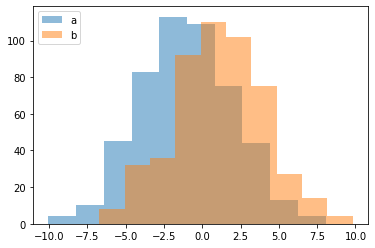

In [24]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

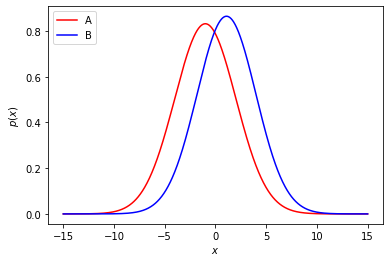

In [25]:
#Practice 4에서 그려야 할 첫번째 pdf
pdf1=np.linspace(-15, 15, 1000)
#mu=(-1, 1)
Y_A=pdf(pdf1, np.mean(train_A), np.std(train_A))
Y_B=pdf(pdf1, np.mean(train_B), np.std(train_B))
#작성되어 있는 pdf 함수 사용
show_pdf(pdf1, Y_A, Y_B)
#작성되어 있는 show_pdf 함수 사용

In [26]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -2, 3, 2, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.72


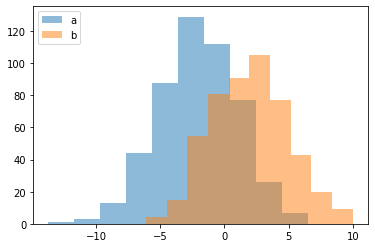

In [27]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

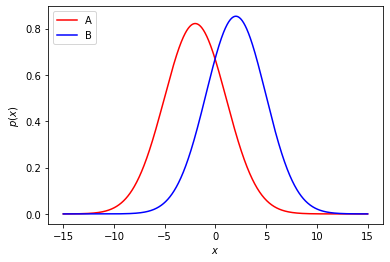

In [28]:
#Practice 4에서 그려야 할 두번째 pdf
pdf2=np.linspace(-15, 15, 1000)
#mu=(-2, 2)
Y_A=pdf(pdf2, np.mean(train_A), np.std(train_A))
Y_B=pdf(pdf2, np.mean(train_B), np.std(train_B))
#작성되어 있는 pdf 함수 사용
show_pdf(pdf2, Y_A, Y_B)
#작성되어 있는 show_pdf 함수 사용

In [29]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -3, 3, 3, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.87


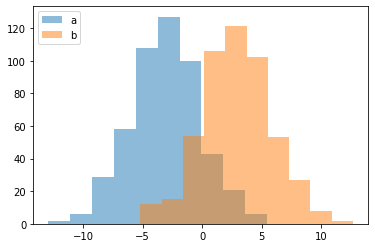

In [30]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

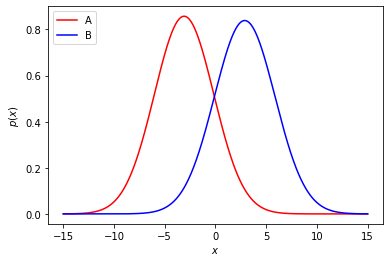

In [31]:
#Practice 4에서 그려야 할 세번째 pdf
pdf3=np.linspace(-15, 15, 1000)
#mu=(-3, 3)
Y_A=pdf(pdf3, np.mean(train_A), np.std(train_A))
Y_B=pdf(pdf3, np.mean(train_B), np.std(train_B))
#작성되어 있는 pdf 함수 사용
show_pdf(pdf1, Y_A, Y_B)
#작성되어 있는 show_pdf 함수 사용

# Practice 4

Practice 3에서 그린 세 개의 히스토그램을 probability density function으로 그리시오.



Practice 3의 각 히스토그램 아래에 그렸습니다.

# Practice 5

두 클래스의 데이터가 다음과 같은 Gaussian 분포를 따른다고 할 때, 아래 설명에 따라 Bayesian 분류기의 분류 정확도를 계산하시오. 

A class : mu = -1, s = 3
B class : mu = 3, s = 2

a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오. 

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)



a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

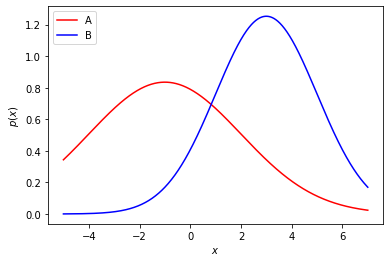

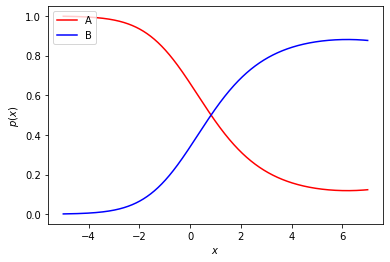

In [32]:
#5-a)
#p(x|A), p(x|B)
graph_5a=np.linspace(-5, 7, 1000)
#mu가 각각 -1, 3이기 때문에 그 차이의 절댓값 4를 기준으로 -5에서 7로 설정
A_5a_likelihood, B_5a_likelihood=get_likelihood(graph_5a, -1, 3, 3, 2)
#작성되어 있는 get_likelihood 함수 사용
show_pdf(graph_5a, A_5a_likelihood, B_5a_likelihood)
#likelihood pdf를 작성되어 있는 show_pdf 사용하여 그림

#P(A|x), P(B|x)
A_5a_posterior, B_5a_posterior=get_posterior(graph_5a, A_5a_likelihood, B_5a_likelihood, 0.5, 0.5)
#P(A)=P(B)라고 했기 때문에 prior를 각각 0.5, 0.5로 설정
#작성되어 있는 get_posterior 함수 사용
show_pdf(graph_5a, A_5a_posterior, B_5a_posterior)

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

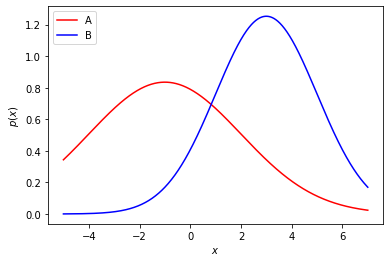

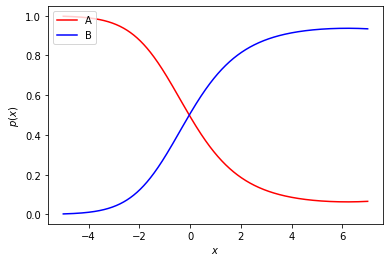

In [33]:
#5-b)
#p(x|A), p(x|B)
graph_5b=np.linspace(-5, 7, 1000)
#a에서와 마찬가지로 mu가 각각 -1, 3이기 때문에 그 차이의 절댓값 4를 기준으로 -5에서 7로 설정
A_5b_likelihood, B_5b_likelihood=get_likelihood(graph_5b, -1, 3, 3, 2)
show_pdf(graph_5b, A_5b_likelihood, B_5b_likelihood)

#P(A|x), P(B|x)
A_5b_posterior, B_5b_posterior=get_posterior(graph_5b, A_5b_likelihood, B_5b_likelihood, 1/3, 2/3)
#b에서는 P(A)=1/3, P(B)=2/3라고 했기 때문에 prior를 1/2, 2/3로 설정
show_pdf(graph_5a, A_5b_posterior, B_5b_posterior)

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오.

In [34]:
#decision point를 구하는 함수
#p(A|x)=p(B|x)를 풀라고 되어 있어서 이를 사용
#P(A|x)=P(x|A)*P(A)/P(X), P(B|x)=P(x|B)*P(B)/P(X)를 사용하는데 P(X)의 경우는 같기 때문에 사용하지 않고 P(x|A)*P(A)=P(x|B)*P(B)를 해결
#likelihood의 경우 Gaussian distribution의 형태를 취하기 때문에 이를 사용한다.
#그러면 gaussian(x, mu of A, std of A)*P(A)=gaussian(x, mu of B, std of B)*P(B)가 되는데 양변에 자연로그를 취한다.
#자연로그를 취한 후 x에 대해서 정리하면 다음과 같은 이차식이 나오게 된다.
#(std of B^2-std of A^2)x^2+2(std of A^2*mu of B-std of B^2*mu of A)x+(std of B^2*mu of A^2-std of A^2*mu of B^2)
#-(2*std of A^2*std of B^2*(ln(P(A)/std of A)-ln(P(B)/std of B)))=0의 이차식이 나오게 된다.
#아래에서는 ax^2+bx+c=0으로 생각하여 a, b, c 변수 지정
#이를 근의 공식을 이용해서 풀면 x가 나오게 되는데 decision point는 두개의 평균 사이에서 나오도록 한다
#또한 만약 두개의 해가 전부 평균 사이에서 나오지 않는다면 평균의 평균과 가까운 것을 decision point로 고른다
#이런 방법을 이용해서 decision point를 구한다.
def get_decision_point(A_mean, A_std, B_mean, B_std, A_prior, B_prior):
    #A_mean: A class의 mu, A_std: A class의 s, B_mean: B class의 mu, B_std: B class의 s, A_prior: P(A), B_prior: P(B)
    a=B_std*B_std-A_std*A_std#위의 이차식에서 x^2의 계수
    b=2*(A_std*A_std*B_mean-B_std*B_std*A_mean)#위의 이차식에서 x의 계수
    c1=B_std*B_std*A_mean*A_mean-A_std*A_std*B_mean*B_mean#위의 이차식에서 두 부분의 상수 중 앞부분
    c2=2*A_std*A_std*B_std*B_std*(math.log(A_prior/A_std)-math.log(B_prior/B_std))#위의 이차식에서 두 부분의 상수 중 앞부분
    c=c1-c2#위의 이차식의 상수 전체
    if a==0:#a가 0이면 근의 공식을 이용할 수 없으며 1차식
        point=-(c/b)#a=0이 되어 bx+c=0의 해
        return point
    else:
        if b*b-4*a*c>=0:#판별식으로 근의 존재 여부 판단
            point1=(-b-math.sqrt(b*b-4*a*c))/(2*a)
            point2=(-b+math.sqrt(b*b-4*a*c))/(2*a)
            #근의 공식에서의 두 근 point1, point2
            if A_mean<B_mean:#pdf에서 A 평균이 왼쪽에 있는 경우
                flag=0
                if A_mean<=point1 and point1<=B_mean:#point1과 point2중에서 A, B의 평균 사이에 있는 것을 판단
                    point=point1
                    flag=1
                elif A_mean<=point2 and point2<=B_mean:
                    point=point2
                    flag=1
                if flag==0:#평균 사이에서 나오지 않는 경우
                    mid=(A_mean+B_mean)/2
                    if abs(mid-point1)<abs(mid-point2):#평균의 평균과 거리 비교
                        point=point1
                    else:
                        point=point2
                return point
            else:#pdf에서 B 평균이 왼쪽에 있는 경우
                flag=0
                if B_mean<=point1 and point1<=A_mean:#point1과 point2중에서 A, B의 평균 사이에 있는 것을 판단
                    point=point1
                    flag=1
                elif B_mean<=point2 and point2<=A_mean:
                    point=point2
                    flag=1
                if flag==0:#평균 사이에서 나오지 않는 경우
                    mid=(A_mean+B_mean)/2
                    if abs(mid-point1)<abs(mid-point2):#평균의 평균과 거리 비교
                        point=point1
                    else:
                        point=point2
                return point

In [35]:
pointx_a=get_decision_point(-1, 3, 3, 2, 0.5, 0.5)#5-a)번 문제에 대한 decision point
pointx_b=get_decision_point(-1, 3, 3, 2, 1/3, 2/3)#5-b)번 문제에 대한 decision point

In [36]:
def show_pdf_with_dc(x, Y_A, Y_B, pointx, pointy):#decision point와 함께 그래프를 그리기 위한 함수
    #기존 show_pdf 함수에 decision point만을 추가, (pointx, pointy)가 decision point
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')
    plt.scatter(pointx, pointy, c='g', s=100, label='decision point')#decision point 그리기

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

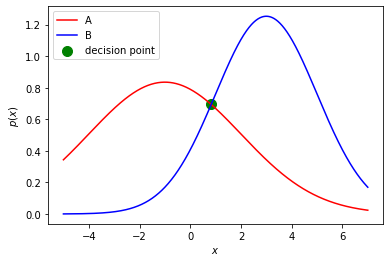

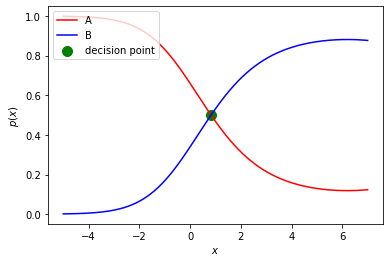

In [37]:
graph_5c_a=np.linspace(-5, 7, 1000)
A_5c_a_likelihood, B_5c_a_likelihood=get_likelihood(graph_5c_a, -1, 3, 3, 2)
#A_5c_a_likelihood는 5-a)의 A class에 대한 likelihood, B_5c_a_likelihood는 5-a)의 B class에 대한 likelihood
likelihood_A_Y_a, likelihood_B_Y_a=get_likelihood(pointx_a, -1, 3, 3, 2)
#pointx_a는 5-a)번 문제에 대한 decision point로 likelihood에 대한 y좌표 구하기
show_pdf_with_dc(graph_5c_a, A_5c_a_likelihood, B_5c_a_likelihood, pointx_a, likelihood_A_Y_a)
#5-a)에서 그렸던 방식과 동일

A_5c_a_posterior, B_5c_a_posterior=get_posterior(graph_5c_a, A_5c_a_likelihood, B_5c_a_likelihood, 0.5, 0.5)
#A_5c_a_posterior는 5-a)의 A class에 대한 posterior, B_5c_a_posterior는 5-a)의 B class에 대한 posterior
posterior_A_Y_a, _=get_posterior(pointx_a, likelihood_A_Y_a, likelihood_B_Y_a, 0.5, 0.5)
#posterior에 대한 y좌표 구하기
show_pdf_with_dc(graph_5c_a, A_5c_a_posterior, B_5c_a_posterior, pointx_a, posterior_A_Y_a)

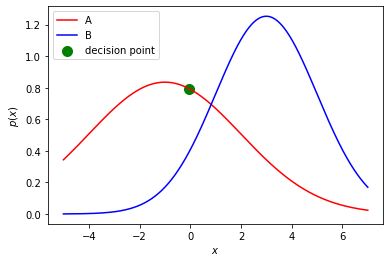

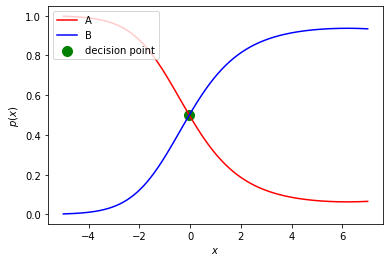

In [38]:
graph_5c_b=np.linspace(-5, 7, 1000)
A_5c_b_likelihood, B_5c_b_likelihood=get_likelihood(graph_5c_b, -1, 3, 3, 2)
#A_5c_b_likelihood는 5-b)의 A class에 대한 likelihood, B_5c_b_likelihood는 5-b)의 B class에 대한 likelihood
likelihood_A_Y_b, likelihood_B_Y_b=get_likelihood(pointx_b, -1, 3, 3, 2)
#pointx_b는 5-b)번 문제에 대한 decision point로 likelihood에 대한 y좌표 구하기
show_pdf_with_dc(graph_5c_b, A_5c_b_likelihood, B_5c_b_likelihood, pointx_b, likelihood_A_Y_b)

A_5c_b_posterior, B_5c_b_posterior=get_posterior(graph_5c_b, A_5c_b_likelihood, B_5c_b_likelihood, 1/3, 2/3)
#A_5c_b_posterior는 5-b)의 A class에 대한 posterior, B_5c_b_posterior는 5-b)의 B class에 대한 posterior
posterior_A_Y_b, _=get_posterior(pointx_b, likelihood_A_Y_b, likelihood_B_Y_b, 1/3, 2/3)
#posterior에 대한 y좌표 구하기
show_pdf_with_dc(graph_5c_b, A_5c_b_posterior, B_5c_b_posterior, pointx_b, posterior_A_Y_b)

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

위의 posterior probability 그래프에서 보이듯이 Decision point의 왼쪽은 P(A|x)>P(B|x)인 부분이고 그렇기 때문에 이 부분에 위치한다는 것은 x가 A class로 분류된다는 뜻입니다. 또한 Decision point의 오른쪽은 P(A|x)<P(B|x)인 부분이고 그렇기 때문에 이 부분에 위치한다는 것은 x가 B class로 분류된다는 뜻입니다. 따라서, 위의 그래프와 같이 Decision point를 구한 후에 Bayesian 분류기의 경우는 들어오는 데이터를 Decision point와 비교하여 Decision point보다 작으면 A class, Decision point보다 크면 B class로 분류하는 방식으로 간단하게 Decision point와 데이터의 비교만을 통해서 분류가 이루어질 수 있게 됩니다.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)

In [39]:
def get_accuracy_by_dc(dc, X, Y):#5-d)에서 언급한 방법을 통해 분류했을 때의 정확도를 구하기 위한 함수
    y_pred=np.where(X<dc, 0, 1)#5-d)에서 말했듯이 decision point보다 작으면 A, 크면 B
    return len(np.where(y_pred==Y)[0])/len(y_pred)#get_accuracy 함수에서 정의한 대로 기술

In [40]:
#A, B 클래스에 대하여 100개씩 샘플링하며 P(A)=P(B)이기 때문에 5-a)에 대한 decision point가 필요해서 pointx_a를 decision point로 지정
decision_point=pointx_a
test_e_A, test_e_B, test_e_YA, test_e_YB = get_data(100, 0.5, -1, 3, 3, 2)
#100개 샘플링
test_e_X = np.concatenate((test_e_A, test_e_B))
test_e_Y = np.concatenate((test_e_YA, test_e_YB)).reshape(-1)
#test_e_X: 테스트 데이터의 X, test_e_Y: 테스트 데이터의 Y

print(f'Acc: {get_accuracy_by_dc(decision_point, test_e_X, test_e_Y)}')
#정확도 구하기

Acc: 0.82
